In [3]:
import pandas as pd

In [22]:

# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/df_def.xlsx'
df = pd.read_excel(file_path)

# Sort the dataframe by 'season' and 'GW' for correct ordering
df = df.sort_values(by=['season', 'GW']).reset_index(drop=True)

# Initialize a column for sequential GW, starting from 1
df['sequential_GW'] = 0

# Create a sequential GW counter starting from GW 1 for 2020-2021 and incrementing across seasons
sequential_gw_counter = 1

# Loop through each unique season and assign sequential GW numbers
for season in df['season'].unique():
    mask = df['season'] == season
    df.loc[mask, 'sequential_GW'] = df.loc[mask, 'GW'] + (sequential_gw_counter - 1)
    
    # Update the sequential_gw_counter based on the maximum GW in the current season
    max_gw_in_season = df.loc[mask, 'GW'].max()
    sequential_gw_counter += max_gw_in_season

# Display the first few rows to verify the sequential GW assignment
print(df[['name', 'season', 'GW', 'sequential_GW']].head(20))


                           name   season  GW  sequential_GW
0               Aaron Cresswell  2020-21   1              1
1                  Adam Webster  2020-21   1              1
2              Andrew Robertson  2020-21   1              1
3              Antonee Robinson  2020-21   1              1
4                    Ben Davies  2020-21   1              1
5                   Ben Johnson  2020-21   1              1
6                   Conor Coady  2020-21   1              1
7                Conor Townsend  2020-21   1              1
8                      Dan Burn  2020-21   1              1
9                   Dara O'Shea  2020-21   1              1
10  Emerson Palmieri dos Santos  2020-21   1              1
11                  Emil Krafth  2020-21   1              1
12                 Fabian Schär  2020-21   1              1
13                    Issa Diop  2020-21   1              1
14                Jack Stephens  2020-21   1              1
15             Jamaal Lascelles  2020-21

In [23]:
# Sort the dataframe by 'name' and 'sequential_GW' to ensure proper ordering
df = df.sort_values(by=['name', 'sequential_GW']).reset_index(drop=True)

# Create the 'next_GW_total_points' column
df['next_GW_total_points'] = 0

# Step 2.1: For each player, shift the total_points column to get the next GW total points
df['next_GW_total_points'] = df.groupby('name')['total_points'].shift(-1)

# Step 2.2: Handle the first game week of every player by assigning the next GW's total points
df['next_GW_total_points'].fillna(0, inplace=True)  # Fill NaN values with 0 for now

# Step 2.3: Set the last game week for every player in the 2024-25 season to 0
last_gw_mask = (df['season'] == '2024-25') & (df.groupby('name')['GW'].transform('max') == df['GW'])
df.loc[last_gw_mask, 'next_GW_total_points'] = 0

# Display the first few rows to verify
print(df[['name', 'season', 'GW', 'total_points', 'next_GW_total_points']].head(20))


               name   season  GW  total_points  next_GW_total_points
0   Aaron Cresswell  2020-21   1             1                   1.0
1   Aaron Cresswell  2020-21   2             1                   7.0
2   Aaron Cresswell  2020-21   3             7                  15.0
3   Aaron Cresswell  2020-21   4            15                   5.0
4   Aaron Cresswell  2020-21   5             5                   2.0
5   Aaron Cresswell  2020-21   6             2                   1.0
6   Aaron Cresswell  2020-21   7             1                   6.0
7   Aaron Cresswell  2020-21   8             6                   7.0
8   Aaron Cresswell  2020-21   9             7                   2.0
9   Aaron Cresswell  2020-21  10             2                   1.0
10  Aaron Cresswell  2020-21  11             1                   5.0
11  Aaron Cresswell  2020-21  12             5                   2.0
12  Aaron Cresswell  2020-21  13             2                   1.0
13  Aaron Cresswell  2020-21  14  

C:\Users\syeds\AppData\Local\Temp\ipykernel_29312\3709368462.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['next_GW_total_points'].fillna(0, inplace=True)  # Fill NaN values with 0 for now


In [24]:
# Sort the dataframe by 'name' and 'sequential_GW' for proper order
df = df.sort_values(by=(['name', 'sequential_GW'])).reset_index(drop=True)

# Step 2: Verify the Results
# 1. Verify that next_GW_total_points matches the total_points of the next game week
df['calculated_next_GW_total_points'] = df.groupby('name')['total_points'].shift(-1).fillna(0)

# 2. Identify mismatches where the calculated next GW total points don't match the actual next_GW_total_points
mismatches = df[df['next_GW_total_points'] != df['calculated_next_GW_total_points']]

# 3. Verify first game week: Check that next_GW_total_points for the first game week of each player is correct
first_gw_mask = df.groupby('name')['GW'].transform('min') == df['GW']
first_gw_check = df[first_gw_mask]

# 4. Verify last game week: Check that last game week of 2024-25 season is set to 0
last_gw_mask = (df['season'] == '2024-25') & (df.groupby('name')['GW'].transform('max') == df['GW'])
last_gw_check = df[last_gw_mask & (df['next_GW_total_points'] != 0)]

# Print the results for review
print(f"Total Mismatches Found: {len(mismatches)}")
print("Sample of mismatches:")
print(mismatches[['name', 'season', 'GW', 'total_points', 'next_GW_total_points', 'calculated_next_GW_total_points']].head(10))

print(f"\nFirst game week check (first GW of each player):")
print(first_gw_check[['name', 'season', 'GW', 'total_points', 'next_GW_total_points']].head(10))

print(f"\nLast game week of 2024-25 set to 0 check (should be 0):")
print(last_gw_check[['name', 'season', 'GW', 'next_GW_total_points']].head(10))

Total Mismatches Found: 0
Sample of mismatches:
Empty DataFrame
Columns: [name, season, GW, total_points, next_GW_total_points, calculated_next_GW_total_points]
Index: []

First game week check (first GW of each player):
                  name   season  GW  total_points  next_GW_total_points
0      Aaron Cresswell  2020-21   1             1                   1.0
38     Aaron Cresswell  2021-22   1             7                   2.0
76     Aaron Cresswell  2022-23   1             1                   2.0
114    Aaron Cresswell  2023-24   1             0                   0.0
152    Aaron Cresswell  2024-25   1             0                   1.0
156       Aaron Hickey  2022-23   1             1                   6.0
194       Aaron Hickey  2023-24   1             0                   5.0
232       Aaron Hickey  2024-25   1             0                   0.0
274  Aaron Wan-Bissaka  2021-22   1             2                   2.0
312  Aaron Wan-Bissaka  2022-23   1             0          

In [25]:
# Save the output for inspection
df.to_excel('corrected_data_sequential_GW_def.xlsx', index=False)

In [26]:
# Load the existing filtered file
df = pd.read_excel("corrected_data_sequential_GW_def.xlsx")

In [27]:
# Replace NaN values in 'next_GW_total_points' with 0
df['next_GW_total_points'] = df['next_GW_total_points'].fillna(0)

In [28]:
# Convert 'GW' column to object type (which is similar to string in pandas)
df['GW'] = df['GW'].astype('object')

In [29]:
# Save the corrected dataframe to a new Excel file
df.to_excel('corrected_data_sequential_GW_def.xlsx', index=False)

In [49]:
# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/corrected_data_sequential_GW_def.xlsx'
df_def = pd.read_excel(file_path)

In [50]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17215 entries, 0 to 17214
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        17215 non-null  object 
 1   position                    17215 non-null  object 
 2   team                        17215 non-null  object 
 3   xP                          17215 non-null  float64
 4   assists                     17215 non-null  int64  
 5   bonus                       17215 non-null  int64  
 6   bps                         17215 non-null  int64  
 7   clean_sheets                17215 non-null  int64  
 8   creativity                  17215 non-null  float64
 9   goals_conceded              17215 non-null  int64  
 10  goals_scored                17215 non-null  int64  
 11  ict_index                   17215 non-null  float64
 12  influence                   17215 non-null  float64
 13  kickoff_time                172

In [51]:
# Convert 'GW' column to object type (which is similar to string in pandas)
df_def['GW'] = df_def['GW'].astype('object')

ValueError: num must be an integer with 1 <= num <= 16, not 17

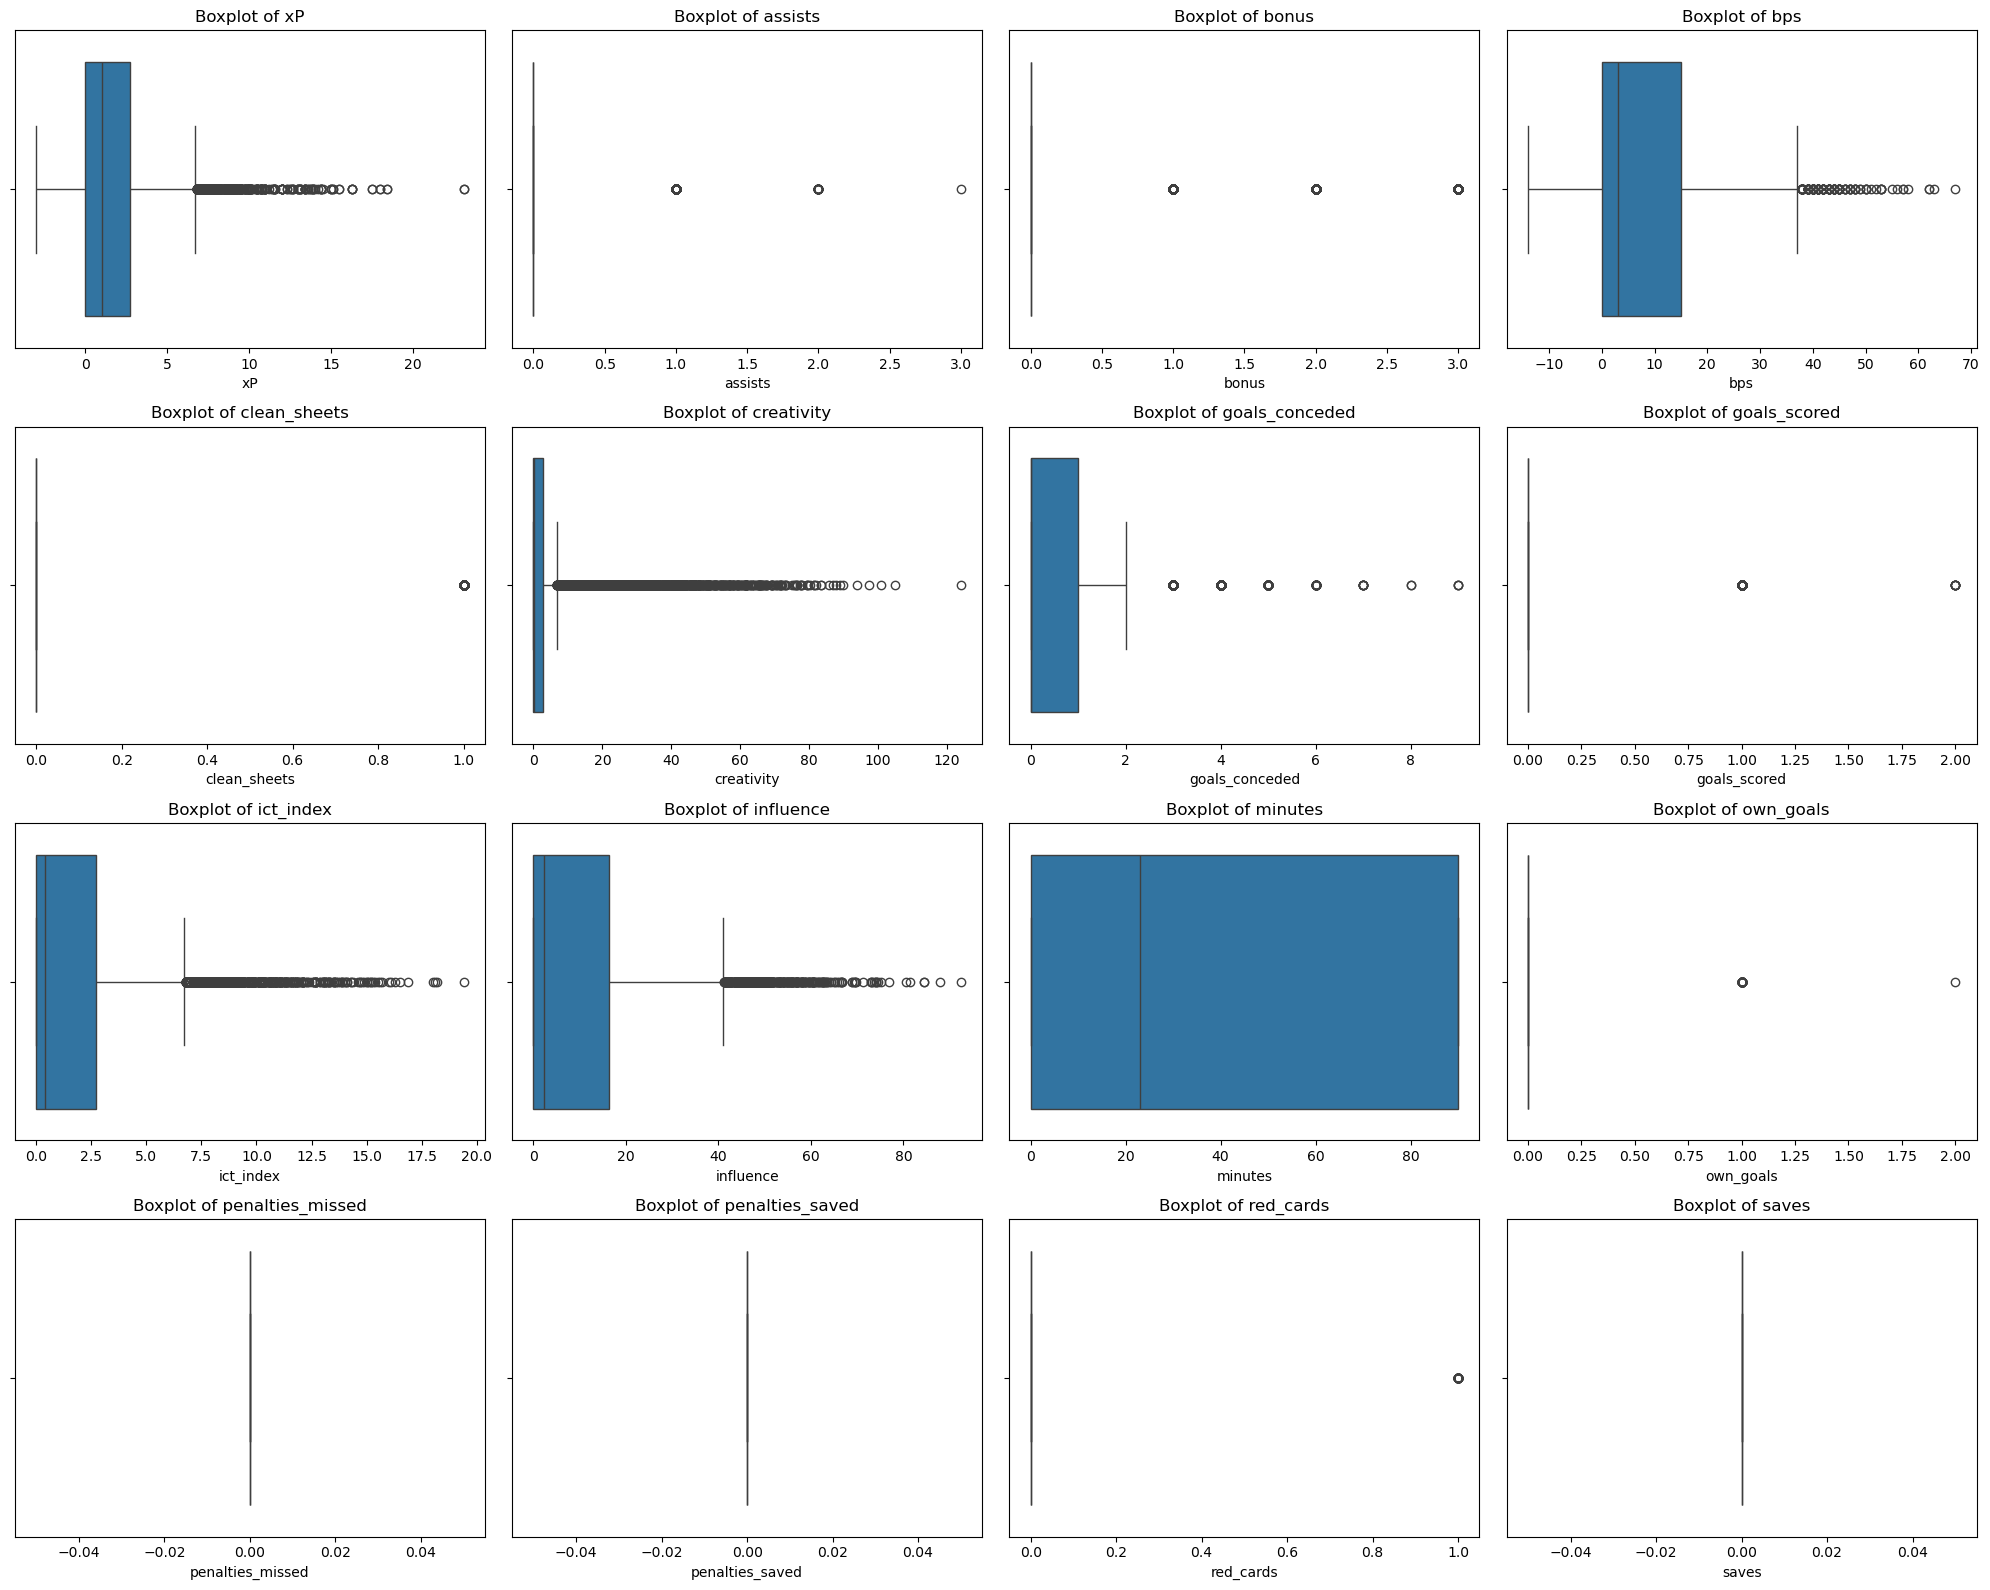

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the outliers in the Goalkeepers (GK) dataset
plt.figure(figsize=(20, 16))
numeric_columns_def = df_def.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each numeric feature
for i, col in enumerate(numeric_columns_def, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = df_def.drop(columns=[ 'name', 'team', 'kickoff_time', 'position', 'season', 'opponent_team','GW','next_GW_total_points'])  # Drop non-numeric columns and target
y = df_def['next_GW_total_points']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Sort feature importance
sorted_indices = importances.argsort()[::-1]
important_features = [(features[i], importances[i]) for i in sorted_indices]

# Display feature importance
for feature, importance in important_features:
    print(f"{feature}: {importance:.4f}")

ValueError: could not convert string to float: 'joe gomez'

In [53]:
# Exclude non-numeric columns
numeric_columns_def = df_def.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_def.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.384580
starts                        0.369299
bps                           0.352340
xP                            0.334731
ict_index                     0.323986
influence                     0.321115
total_points                  0.269418
expected_goals_conceded       0.240418
creativity                    0.235286
value                         0.223280
expected_goal_involvements    0.209192
goals_conceded                0.203200
selected                      0.190608
threat                        0.188662
clean_sheets                  0.186003
expected_assists              0.183484
transfers_in                  0.169376
expected_goals                0.151800
bonus                         0.145769
transfers_balance             0.104969
assists                       0.100731
yellow_cards                  0.096232
goals_scored                  0.076571
fixture_difficulty            0.060648
transfers_out            

In [55]:
# Define the columns to drop
columns_to_drop = [
    'penalties_missed','saves','penalties_saved','own_goals', 'red_cards', 'yellow_cards','threat', 'creativity', 
    'bonus','team_a_score','team_h_score','transfers_out','transfers_in','goals_scored','assists'
]

# Drop the columns from the goalkeeper dataset
df_def_cleaned = df_def.drop(columns=columns_to_drop)

# Check the updated dataset
print(df_def_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17215 entries, 0 to 17214
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        17215 non-null  object 
 1   position                    17215 non-null  object 
 2   team                        17215 non-null  object 
 3   xP                          17215 non-null  float64
 4   bps                         17215 non-null  int64  
 5   clean_sheets                17215 non-null  int64  
 6   goals_conceded              17215 non-null  int64  
 7   ict_index                   17215 non-null  float64
 8   influence                   17215 non-null  float64
 9   kickoff_time                17215 non-null  object 
 10  minutes                     17215 non-null  int64  
 11  opponent_team               17215 non-null  object 
 12  selected                    17215 non-null  int64  
 13  total_points                172

In [56]:
# Exclude non-numeric columns
numeric_columns_def = df_def_cleaned.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_def.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.384580
starts                        0.369299
bps                           0.352340
xP                            0.334731
ict_index                     0.323986
influence                     0.321115
total_points                  0.269418
expected_goals_conceded       0.240418
value                         0.223280
expected_goal_involvements    0.209192
goals_conceded                0.203200
selected                      0.190608
clean_sheets                  0.186003
expected_assists              0.183484
expected_goals                0.151800
transfers_balance             0.104969
fixture_difficulty            0.060648
Name: next_GW_total_points, dtype: float64


In [57]:
# Ensure that 'kickoff_time' is parsed as a datetime for time-series modeling
df_def_cleaned['kickoff_time'] = pd.to_datetime(df_def_cleaned['kickoff_time'])

# Check the new dataset
print(df_def_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17215 entries, 0 to 17214
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        17215 non-null  object             
 1   position                    17215 non-null  object             
 2   team                        17215 non-null  object             
 3   xP                          17215 non-null  float64            
 4   bps                         17215 non-null  int64              
 5   clean_sheets                17215 non-null  int64              
 6   goals_conceded              17215 non-null  int64              
 7   ict_index                   17215 non-null  float64            
 8   influence                   17215 non-null  float64            
 9   kickoff_time                17215 non-null  datetime64[ns, UTC]
 10  minutes                     17215 non-null  int64         

In [58]:
# Sort data by player and gameweek
df_def_final = df_def_cleaned.sort_values(['name', 'GW'])

# List of features to compute rolling averages
features_to_roll = ['total_points', 'influence','clean_sheets','goals_conceded']

# Rolling averages for 10
for feature in features_to_roll:
    df_def_final[f'rolling_avg_{feature}_10gw'] = df_def_cleaned.groupby('name')[feature].transform(lambda x: x.rolling(window=10, min_periods=1).mean())


# Check the new rolling averague columns
print(df_def_final.head())

              name position      team   xP  bps  clean_sheets  goals_conceded  \
0  aaron cresswell      DEF  West Ham  2.1   11             0               2   
1  aaron cresswell      DEF  West Ham  0.5   17             0               2   
2  aaron cresswell      DEF  West Ham  3.0   32             1               0   
3  aaron cresswell      DEF  West Ham  5.5   57             1               0   
4  aaron cresswell      DEF  West Ham  8.5   27             0               3   

   ict_index  influence              kickoff_time  ...  expected_goals  \
0        2.2       10.4 2020-09-12 19:00:00+00:00  ...         0.03800   
1        6.2       27.0 2020-09-19 19:00:00+00:00  ...         0.10200   
2        8.8       35.8 2020-09-27 18:00:00+00:00  ...         0.42200   
3       10.5       52.8 2020-10-04 11:00:00+00:00  ...         0.16812   
4        6.8       32.6 2020-10-18 15:30:00+00:00  ...         0.05800   

  expected_goals_conceded  starts  fixture_difficulty  GW  \
0      

In [19]:
# Select only numeric columns from the scaled dataframe
numeric_df_def = df_def_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_def.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                       xP       bps  clean_sheets  \
xP                               1.000000  0.573148      0.298928   
bps                              0.573148  1.000000      0.269943   
clean_sheets                     0.298928  0.269943      1.000000   
goals_conceded                   0.292277  0.229023     -0.219066   
ict_index                        0.622772  0.812952      0.343015   
influence                        0.573626  0.950846      0.268482   
minutes                          0.615297  0.494968      0.428766   
selected                         0.499691  0.257826      0.158310   
total_points                     0.629083  0.959150      0.316157   
transfers_balance                0.346760  0.098725      0.094082   
value                            0.443718  0.253856      0.176294   
expected_assists                 0.330715  0.364290      0.227921   
expected_goal_involvements       0.516451  0.620056      0.272256   
expected_goals

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the numerical features for VIF calculation
X = df_def_final.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                            Feature        VIF
0                                xP   4.362581
1                               bps  27.879774
2                      clean_sheets   6.041264
3                    goals_conceded   5.698047
4                         ict_index  12.683610
5                         influence  15.444391
6                           minutes  53.453789
7                          selected   1.744090
8                      total_points  16.681124
9                 transfers_balance   1.183843
10                            value   3.193846
11                 expected_assists  24.685860
12       expected_goal_involvements  67.277565
13                   expected_goals  29.821781
14          expected_goals_conceded   4.266410
15                           starts  40.554405
16               fixture_difficulty   1.211875
17             next_GW_total_points   1.648621
18    rolling_avg_total_points_10gw  32.842405
19       rolling_avg_influence_10gw  25.819729
20    rolling

In [60]:
# Dropping the chosen features
df_def_cleaned = df_def_final.drop(columns=['minutes','influence','expected_goal_involvements','goals_conceded','clean_sheets','total_points','rolling_avg_influence_10gw'])

# Verifying the cleaned dataframe
print(df_def_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17215 entries, 0 to 17212
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   name                             17215 non-null  object             
 1   position                         17215 non-null  object             
 2   team                             17215 non-null  object             
 3   xP                               17215 non-null  float64            
 4   bps                              17215 non-null  int64              
 5   ict_index                        17215 non-null  float64            
 6   kickoff_time                     17215 non-null  datetime64[ns, UTC]
 7   opponent_team                    17215 non-null  object             
 8   selected                         17215 non-null  int64              
 9   transfers_balance                17215 non-null  int64              
 10  val

In [161]:
# Select only numeric columns from the scaled dataframe
numeric_df_def = df_def_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_def.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                       xP       bps  ict_index  selected  \
xP                               1.000000  0.641210   0.537456  0.361644   
bps                              0.641210  1.000000   0.771659  0.269275   
ict_index                        0.537456  0.771659   1.000000  0.312000   
selected                         0.361644  0.269275   0.312000  1.000000   
transfers_balance                0.350472  0.186138   0.188522  0.089180   
value                            0.379245  0.292481   0.326102  0.538801   
expected_assists                 0.314049  0.424577   0.593545  0.288226   
expected_goals                   0.288110  0.347728   0.543881  0.129702   
expected_goals_conceded          0.283352  0.456686   0.453037  0.126657   
starts                           0.543533  0.796000   0.681036  0.243033   
fixture_difficulty               0.241260  0.088237   0.068194  0.171393   
next_GW_total_points             0.332700  0.351088   0.321306  0.18

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select the numerical features for VIF calculation
X = df_def_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                            Feature        VIF
0                                xP   4.216795
1                               bps   7.499682
2                         ict_index   6.521029
3                          selected   1.706982
4                 transfers_balance   1.176166
5                             value   3.153728
6                  expected_assists   1.837924
7                    expected_goals   1.638439
8           expected_goals_conceded   3.143890
9                            starts   9.209428
10               fixture_difficulty   1.195267
11             next_GW_total_points   1.636615
12    rolling_avg_total_points_10gw  16.220414
13    rolling_avg_clean_sheets_10gw   9.205953
14  rolling_avg_goals_conceded_10gw   4.219518


In [62]:
df_def_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17215 entries, 0 to 17212
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   name                             17215 non-null  object             
 1   position                         17215 non-null  object             
 2   team                             17215 non-null  object             
 3   xP                               17215 non-null  float64            
 4   bps                              17215 non-null  int64              
 5   ict_index                        17215 non-null  float64            
 6   kickoff_time                     17215 non-null  datetime64[ns, UTC]
 7   opponent_team                    17215 non-null  object             
 8   selected                         17215 non-null  int64              
 9   transfers_balance                17215 non-null  int64              
 10  val

In [84]:
df_def_cleaned.to_csv('df_def_cleaned.csv', index=False)


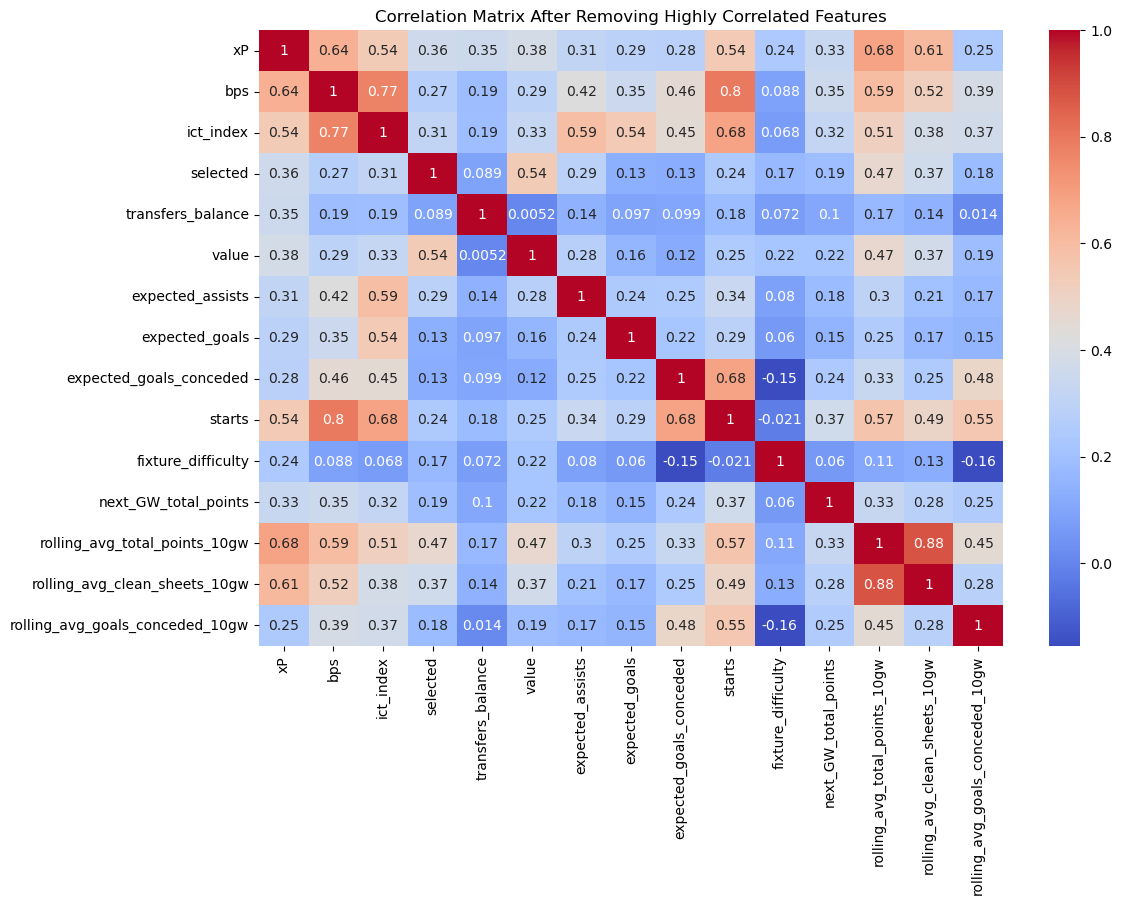

In [164]:
# Step 3: Check the correlation matrix again to see if there are any remaining highly correlated features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Removing Highly Correlated Features')
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_def = df_def_cleaned.drop(columns=['next_GW_total_points'])  # Features
y_def = df_def_cleaned['next_GW_total_points']  # Target (Total Points)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_def_scaled = scaler.fit_transform(X_def.select_dtypes(include=[float, int]))

# Create a DataFrame for scaled features
df_def_scaled = pd.DataFrame(X_def_scaled, columns=X_def.select_dtypes(include=[float, int]).columns)

# Check the scaled data
print(df_def_scaled.head())

         xP       bps  ict_index  selected  transfers_balance     value  \
0  0.184341  0.259616   0.207038 -0.368684          -0.028815  0.612628   
1 -0.534424  0.849245   1.875670 -0.380093          -0.193319  0.612628   
2  0.588647  2.323318   2.960281 -0.387108          -0.123422  0.449136   
3  1.711717  4.780105   3.669449 -0.382449          -0.027815  0.449136   
4  3.059402  1.831960   2.125965 -0.083810           1.898215  0.449136   

   expected_assists  expected_goals  expected_goals_conceded    starts  \
0         -0.122051        0.194019                 1.708869  1.054151   
1          0.057203        1.031650                 0.031258  1.054151   
2          1.969244        5.219803                 0.674424  1.054151   
3          3.205170        1.897027                -0.290031  1.054151   
4          2.596633        0.455779                 1.425191  1.054151   

   fixture_difficulty  rolling_avg_total_points_10gw  \
0           -0.111056                      -0.40

In [64]:
print(df_def_scaled.columns)

Index(['xP', 'bps', 'ict_index', 'selected', 'transfers_balance', 'value',
       'expected_assists', 'expected_goals', 'expected_goals_conceded',
       'starts', 'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_clean_sheets_10gw', 'rolling_avg_goals_conceded_10gw'],
      dtype='object')


In [65]:
# Add missing columns back to the scaled dataframe from the original cleaned dataframe
df_def_scaled['name'] = df_def_cleaned['name']
df_def_scaled['team'] = df_def_cleaned['team']
df_def_scaled['season'] = df_def_cleaned['season']
df_def_scaled['kickoff_time'] = df_def_cleaned['kickoff_time']
df_def_scaled['next_GW_total_points'] = df_def_cleaned['next_GW_total_points']
df_def_scaled['GW'] = df_def_cleaned['GW']



# Check the updated columns to ensure everything is back
print(df_def_scaled.columns)

Index(['xP', 'bps', 'ict_index', 'selected', 'transfers_balance', 'value',
       'expected_assists', 'expected_goals', 'expected_goals_conceded',
       'starts', 'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_clean_sheets_10gw', 'rolling_avg_goals_conceded_10gw',
       'name', 'team', 'season', 'kickoff_time', 'next_GW_total_points', 'GW'],
      dtype='object')


In [66]:
# Sort the data by kickoff_time to ensure time order
df_def_final = df_def_scaled.sort_values(by='kickoff_time')

# Use 70% of the data for training and 30% for testing
train_size = int(0.7 * len(df_def_final))

# Split the data into training and test sets
train_data = df_def_final[:train_size]
test_data = df_def_final[train_size:]

# Check the split
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 12050
Test set size: 5165


In [67]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
features = ['xP', 'bps', 'ict_index', 'selected', 'transfers_balance', 'value',
       'expected_assists', 'expected_goals', 'expected_goals_conceded',
       'starts', 'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_clean_sheets_10gw', 'rolling_avg_goals_conceded_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2.5225841647758833
MAE: 1.6684389841244245


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost - RMSE: 2.5225841647758833, MAE: 1.6684389841244245


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - RMSE: 2.564664935296391, MAE: 1.7706590651362193


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting - RMSE: 2.5379208527215864, MAE: 1.6863191874186636
Ridge Regression - RMSE: 2.4344666623122926, MAE: 1.6220651000652688
ElasticNet - RMSE: 2.5202257630859095, MAE: 1.7755223722538787


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVR - RMSE: 2.5646851531940738, MAE: 1.340051598214437


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KNeighbors - RMSE: 2.699385753513749, MAE: 1.7587221684414325
Neural Network (MLP) - RMSE: 3.309454265606116, MAE: 2.1815179860591294


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


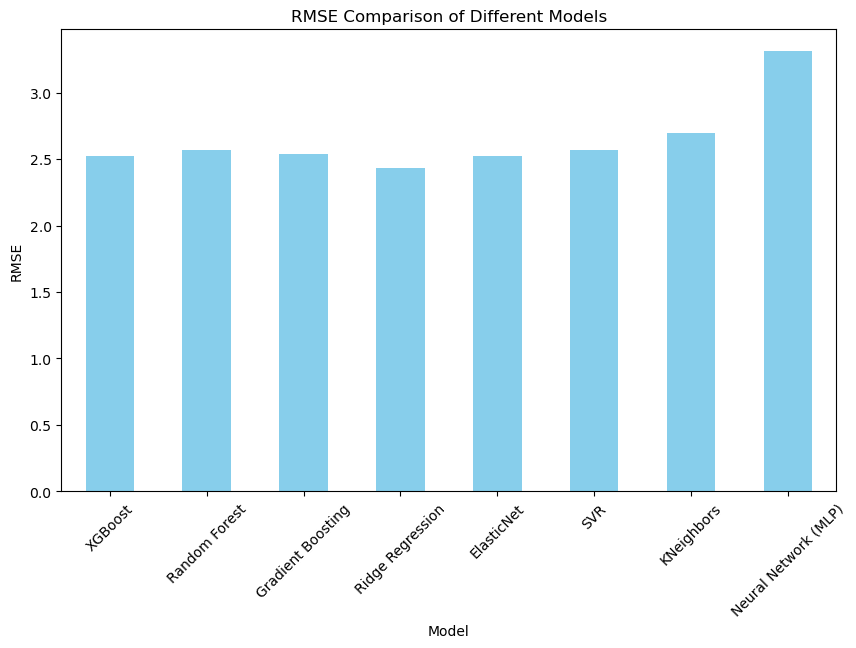

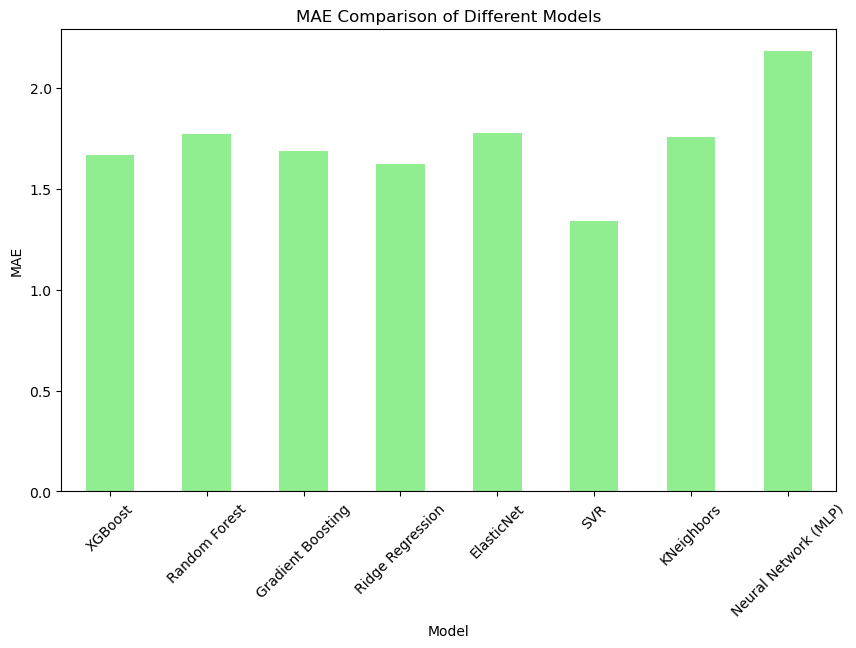

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Define features and target
features = ['xP', 'bps', 'ict_index', 'selected', 'transfers_balance', 'value',
       'expected_assists', 'expected_goals', 'expected_goals_conceded',
       'starts', 'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_clean_sheets_10gw', 'rolling_avg_goals_conceded_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize and evaluate each model
models = {
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "Ridge Regression": Ridge(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# Dictionary to store RMSE and MAE for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{model_name} - RMSE: {rmse}, MAE: {mae}")

# Convert the results into a DataFrame for easy visualization
results_df = pd.DataFrame(results).T

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE Comparison of Different Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 6))
results_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('MAE Comparison of Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Best parameters for high scorers model:  OrderedDict([('colsample_bytree', 1.0), ('gamma', 1), ('learning_rate', 0.016262325569048133), ('max_depth', 3), ('min_child_weight', 7), ('n_estimators', 100), ('reg_alpha', 0), ('reg_lambda', 10.0), ('subsample', 0.5)])
Best parameters for low scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 1), ('learning_rate', 0.029349874777929445), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 100), ('reg_alpha', 0), ('reg_lambda', 10.0), ('subsample', 1.0)])
Combined Model Test RMSE: 1.2528337079748224
                              next_GW_total_points  Predicted
name                                                         
ola aina                                  5.500000   3.877462
benjamin white                            4.971429   4.196410
william saliba                            4.428571   4.557711
gabriel dos santos magalhaes              4.371429   4.391136
wout faes                                 4.000000   4.035

C:\Users\syeds\AppData\Local\Temp\ipykernel_29312\2600196552.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),


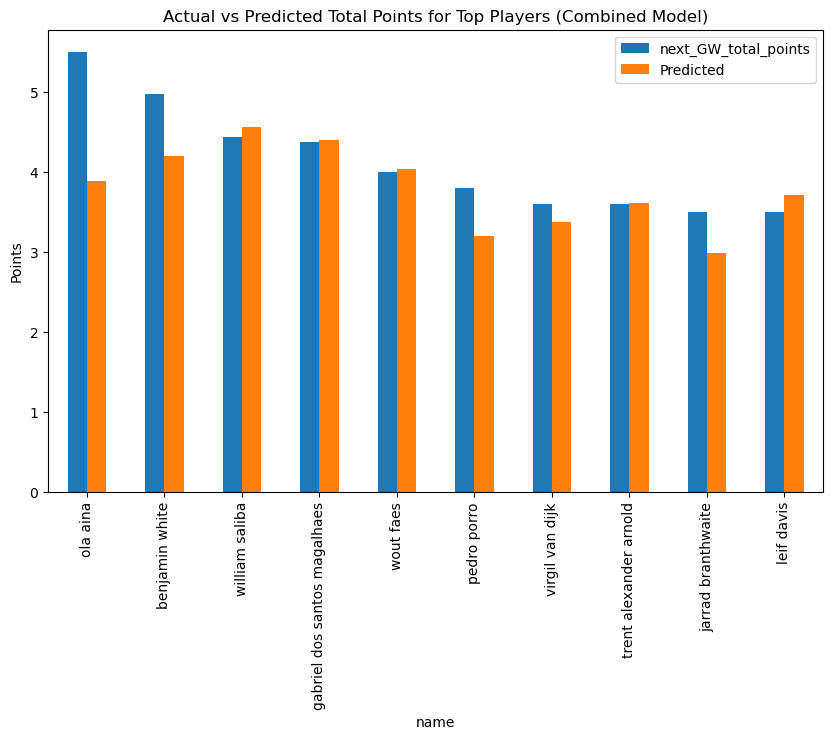

In [69]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Remove prediction-related columns if they exist in the dataset
if 'Predicted' in test_data.columns:
    test_data = test_data.drop(columns=['Predicted'])

# Define a threshold to split players into high and low scorers (e.g., threshold = 6)
threshold = 6

# Split the data into high and low scoring players
high_scorers_train = train_data[train_data['next_GW_total_points'] >= threshold]
low_scorers_train = train_data[train_data['next_GW_total_points'] < threshold]

high_scorers_test = test_data[test_data['next_GW_total_points'] >= threshold]
low_scorers_test = test_data[test_data['next_GW_total_points'] < threshold]

# Define Bayesian Optimization search space (you can adjust this based on your specific needs)
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 1),
    'reg_alpha': (0, 10),
    'reg_lambda': (0.1, 10),
    'min_child_weight': (1, 10)
}

# Define X_train and y_train for high and low scorers
X_train_high = high_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_high = high_scorers_train['next_GW_total_points']

X_train_low = low_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_low = low_scorers_train['next_GW_total_points']

X_test_high = high_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_high = high_scorers_test['next_GW_total_points']

X_test_low = low_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_low = low_scorers_test['next_GW_total_points']

# Bayesian optimization for high scorers model
opt_high = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_high.fit(X_train_high, y_train_high)
best_params_high = opt_high.best_params_
print("Best parameters for high scorers model: ", best_params_high)

# Bayesian optimization for low scorers model
opt_low = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_low.fit(X_train_low, y_train_low)
best_params_low = opt_low.best_params_
print("Best parameters for low scorers model: ", best_params_low)

# Re-train the high and low scorers models with the best parameters
best_xgb_high = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)
best_xgb_high.fit(X_train_high, y_train_high)

best_xgb_low = XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42)
best_xgb_low.fit(X_train_low, y_train_low)

# Make predictions for high and low scorers
y_pred_high = best_xgb_high.predict(X_test_high)
y_pred_low = best_xgb_low.predict(X_test_low)

# Combine predictions
test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),
                                    pd.Series(y_pred_low, index=low_scorers_test.index)])

# Calculate RMSE for the combined model
y_test_combined = pd.concat([y_test_high, y_test_low])
y_pred_combined = test_data['Predicted']
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
print(f'Combined Model Test RMSE: {rmse_combined}')

# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()

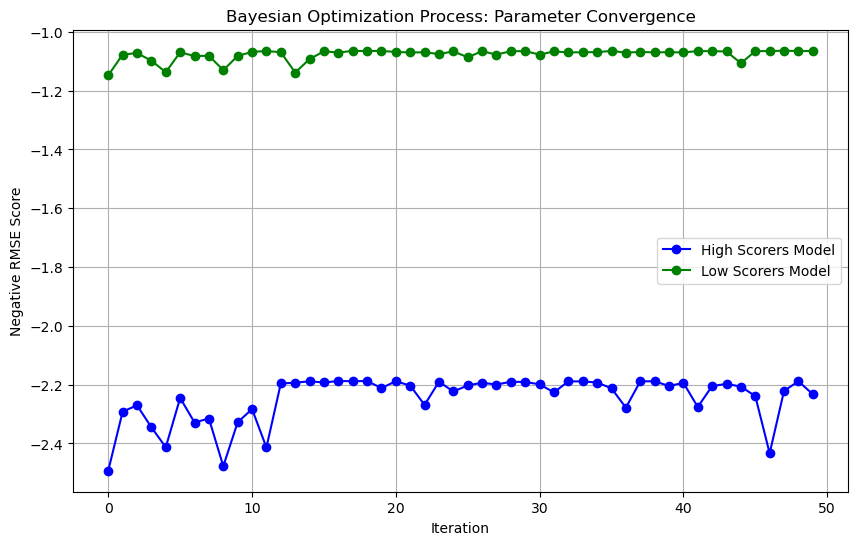

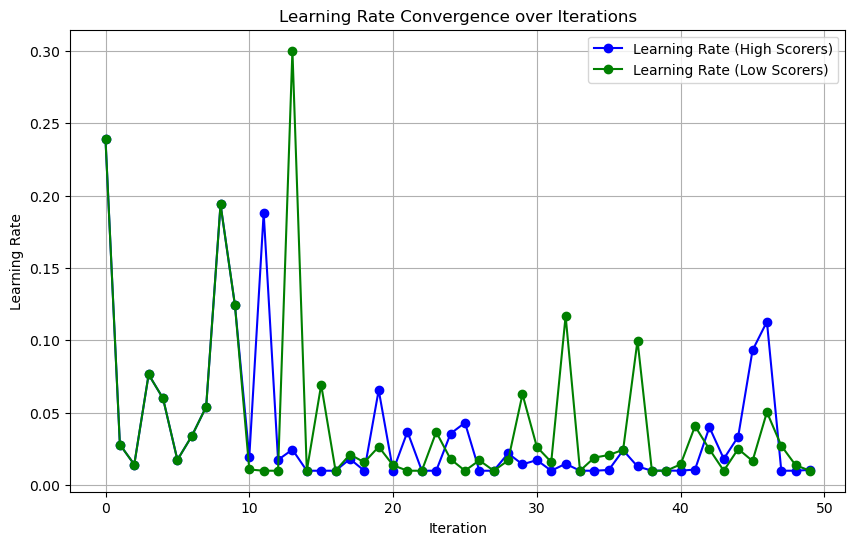

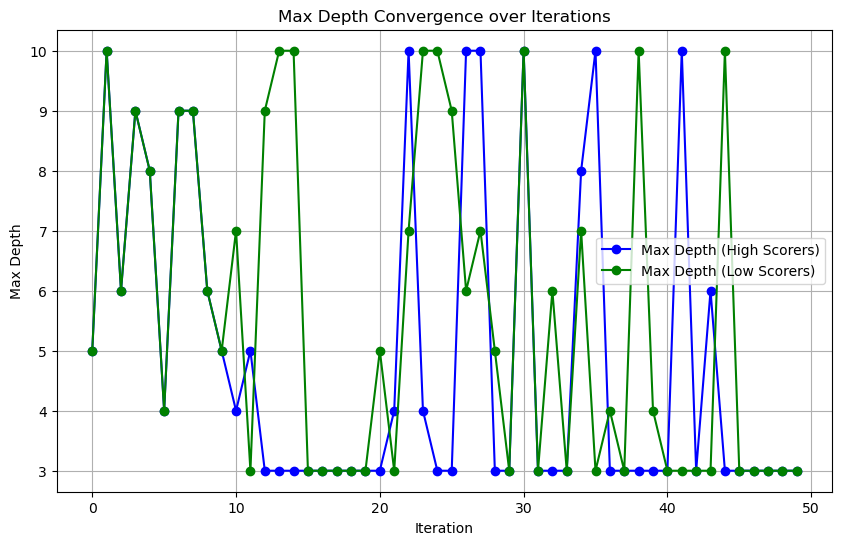

In [48]:
import matplotlib.pyplot as plt

# Extracting the results of the Bayesian optimization for high scorers
results_high = pd.DataFrame(opt_high.cv_results_)
results_low = pd.DataFrame(opt_low.cv_results_)

# Plot the optimization convergence for high scorers
plt.figure(figsize=(10, 6))
plt.plot(results_high['mean_test_score'], marker='o', label='High Scorers Model', color='blue')
plt.plot(results_low['mean_test_score'], marker='o', label='Low Scorers Model', color='green')
plt.title('Bayesian Optimization Process: Parameter Convergence')
plt.xlabel('Iteration')
plt.ylabel('Negative RMSE Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# To also track how specific parameters like 'learning_rate' or 'max_depth' converge:
plt.figure(figsize=(10, 6))
plt.plot(results_high['param_learning_rate'], marker='o', label='Learning Rate (High Scorers)', color='blue')
plt.plot(results_low['param_learning_rate'], marker='o', label='Learning Rate (Low Scorers)', color='green')
plt.title('Learning Rate Convergence over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results_high['param_max_depth'], marker='o', label='Max Depth (High Scorers)', color='blue')
plt.plot(results_low['param_max_depth'], marker='o', label='Max Depth (Low Scorers)', color='green')
plt.title('Max Depth Convergence over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Max Depth')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [82]:
# Save the trained models using joblib
joblib.dump(best_xgb_high, 'gk_xgb_high_model.pkl')
joblib.dump(best_xgb_low, 'gk_xgb_low_model.pkl')

['gk_xgb_low_model.pkl']

In [83]:
# Alternatively, save them as CSV files
train_data.to_csv('def_train_data.csv', index=False)
test_data.to_csv('def_test_data.csv', index=False)

print("Training and test datasets have been saved.")

Training and test datasets have been saved.


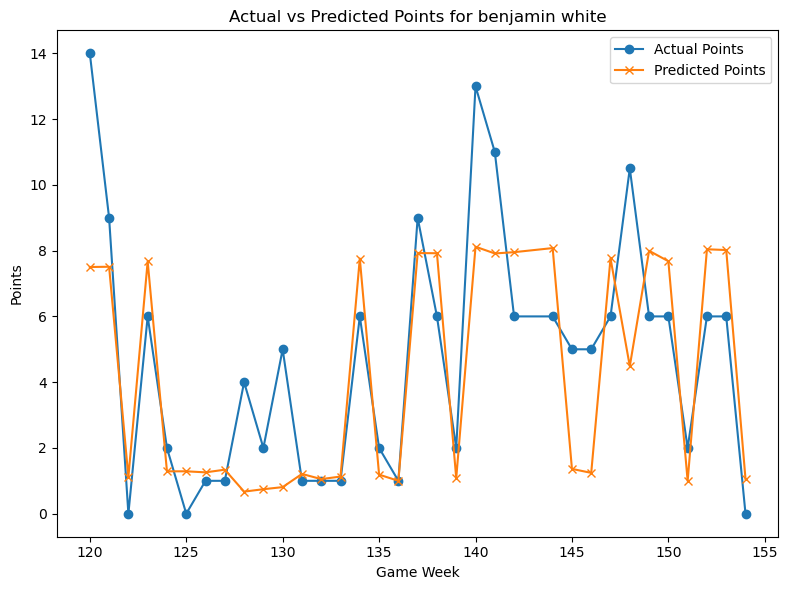

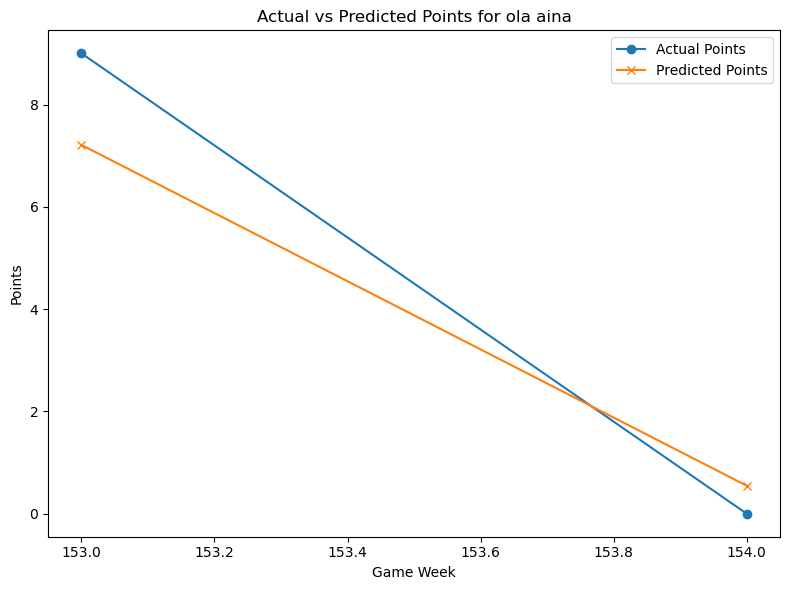

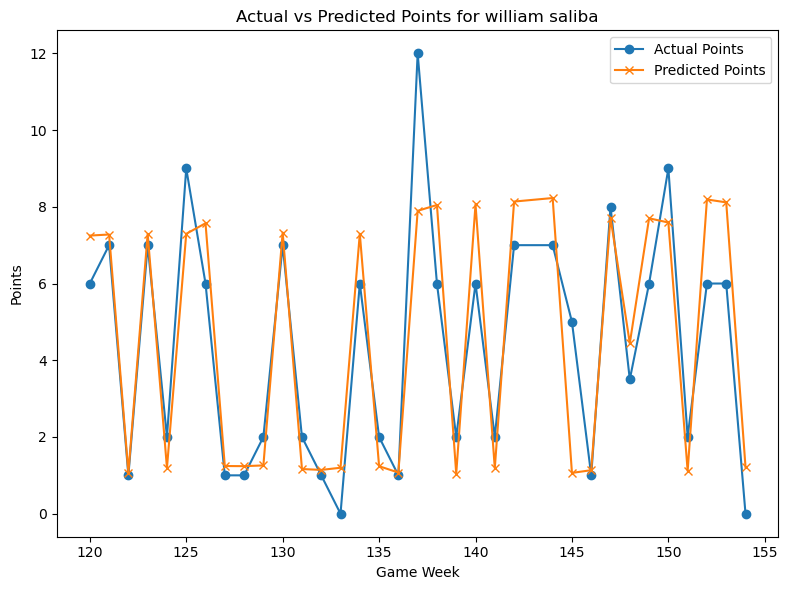

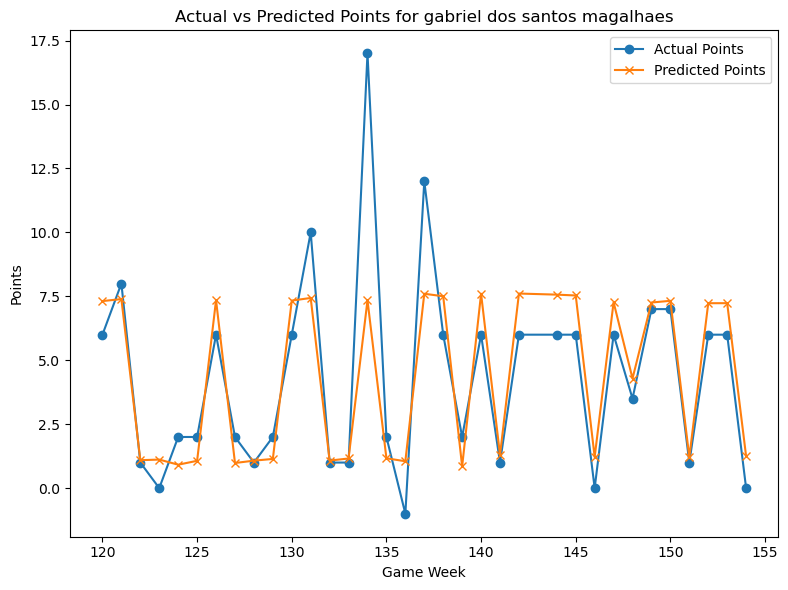

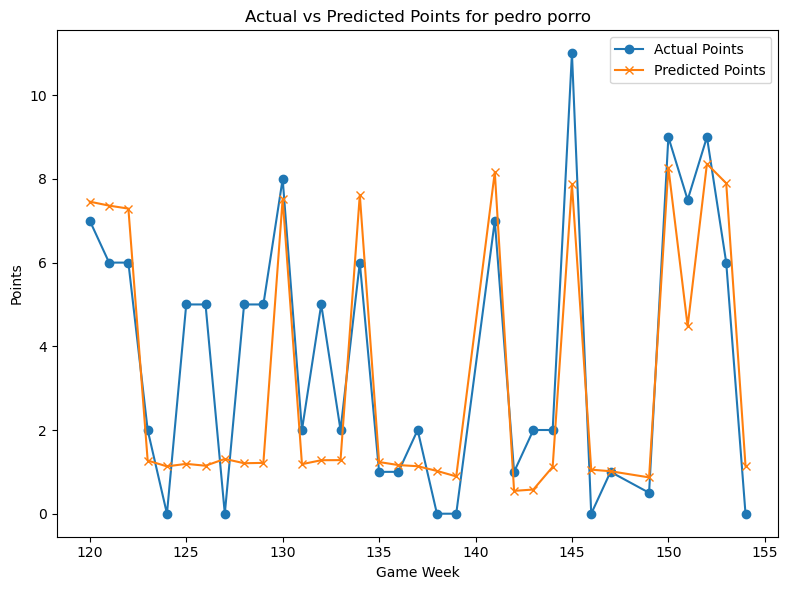

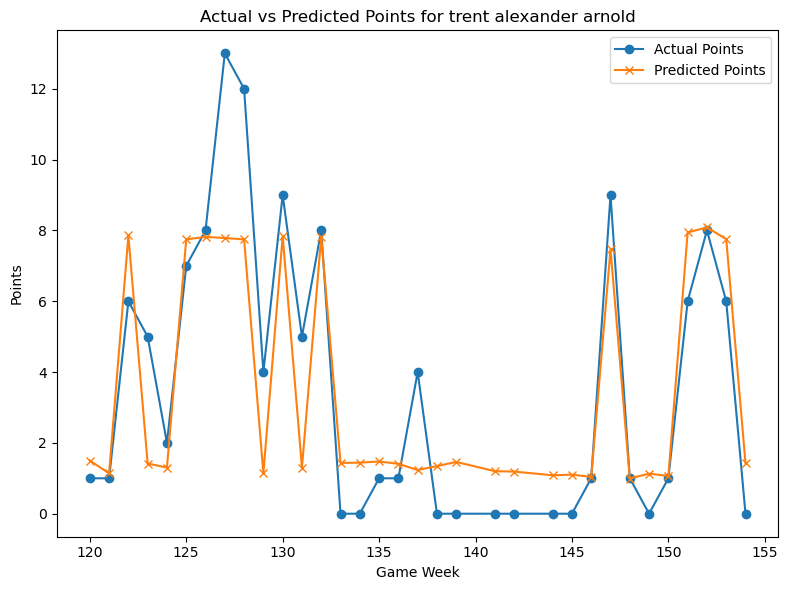

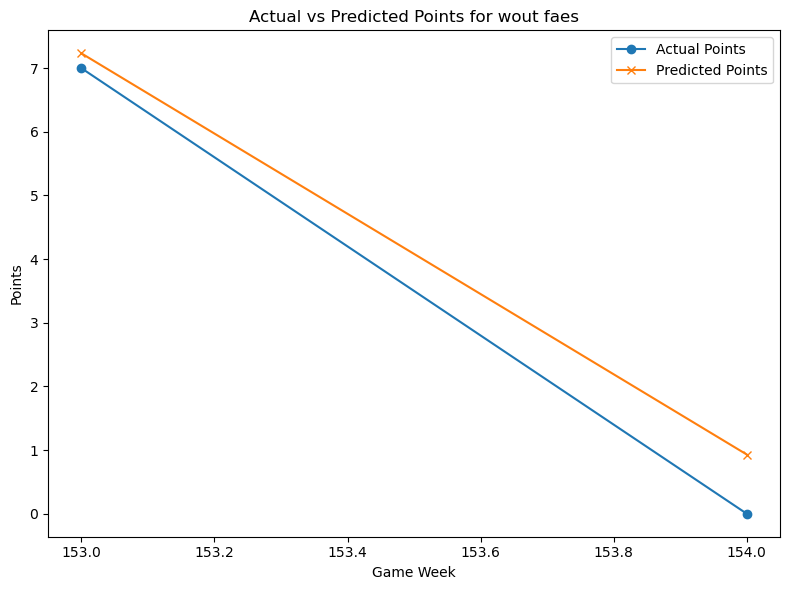

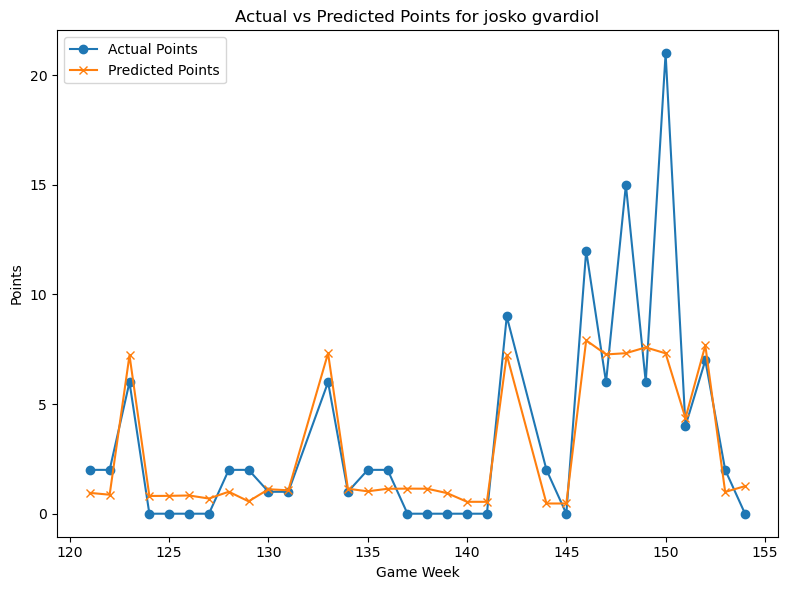

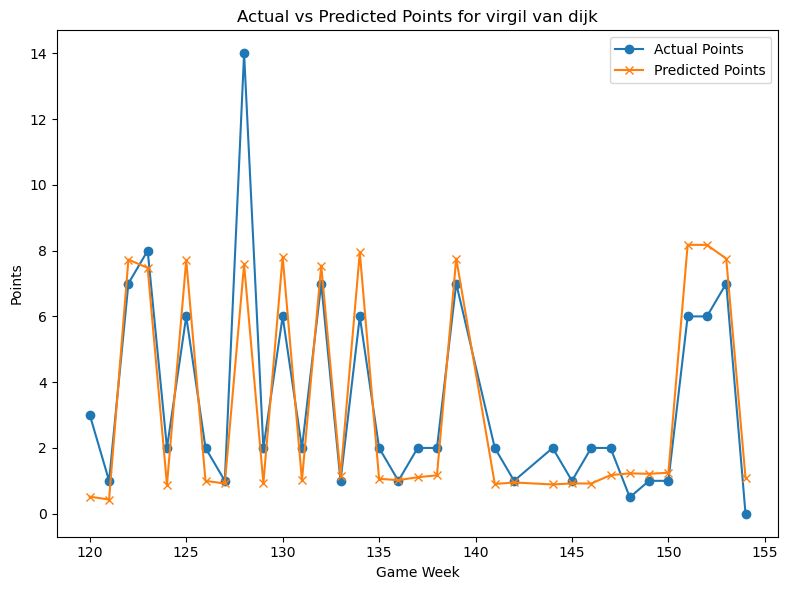

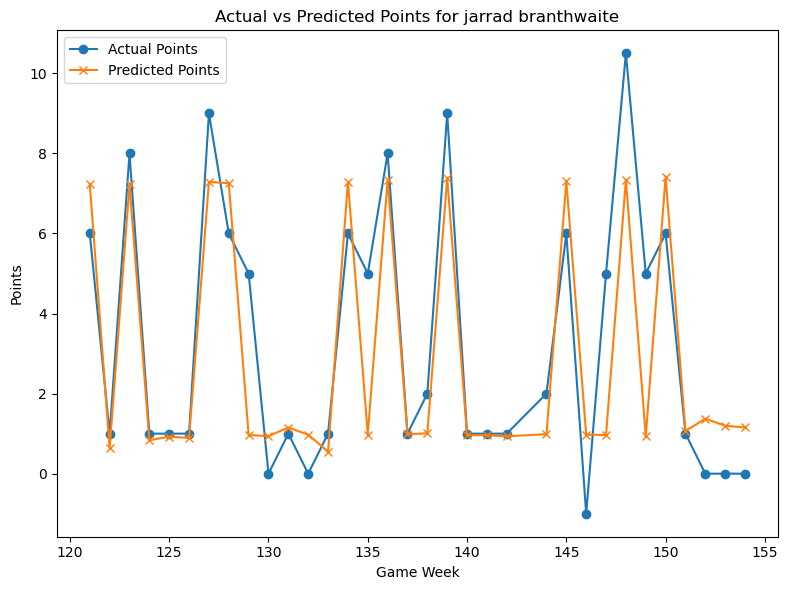

In [38]:
import matplotlib.pyplot as plt

# Group by game week and player, then calculate the average actual and predicted points
gw_performance = test_data.groupby(['GW', 'name']).agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).reset_index()

# Get the top players by their actual total points
top_players_gws = gw_performance.groupby('name').agg({'next_GW_total_points': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10).index

# Filter the performance for these top players
top_gw_performance = gw_performance[gw_performance['name'].isin(top_players_gws)]

# Create a separate plot for each player
for player in top_players_gws:
    player_data = top_gw_performance[top_gw_performance['name'] == player]
    plt.figure(figsize=(8, 6))
    plt.plot(player_data['GW'], player_data['next_GW_total_points'], label=f'Actual Points', marker='o')
    plt.plot(player_data['GW'], player_data['Predicted'], label=f'Predicted Points', marker='x')
    plt.title(f'Actual vs Predicted Points for {player}')
    plt.xlabel('Game Week')
    plt.ylabel('Points')
    plt.legend()
    plt.tight_layout()
    plt.show()

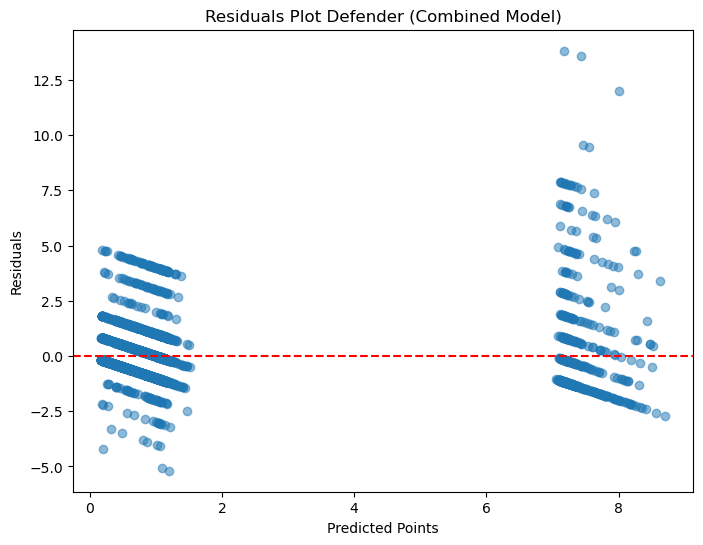

In [74]:
# Calculate residuals (actual - predicted)
test_data['Residuals'] = test_data['next_GW_total_points'] - test_data['Predicted']

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Predicted'], test_data['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot Defender (Combined Model)')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

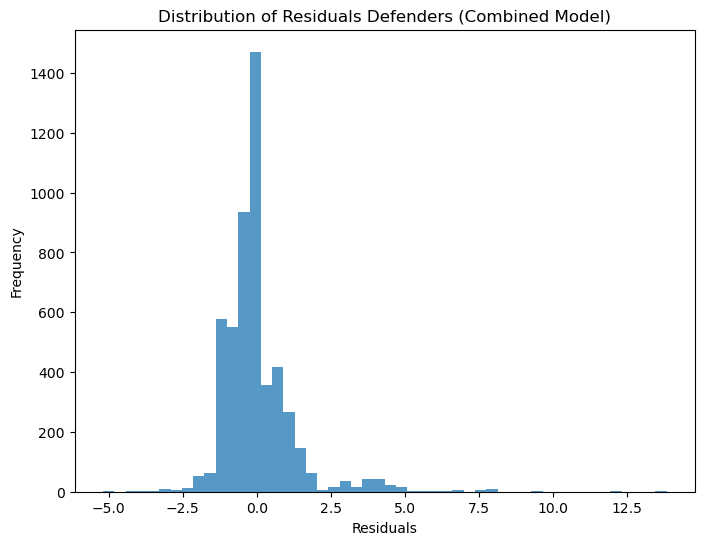

In [75]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(test_data['Residuals'], bins=50, alpha=0.75)
plt.title('Distribution of Residuals Defenders (Combined Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

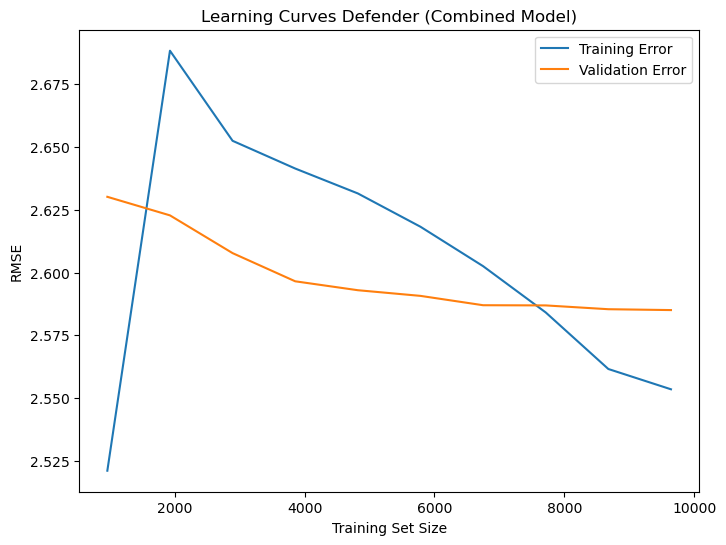

In [76]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the best_xgb model (assumes that best_params_high or best_params_low is already defined)
best_xgb = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)

# Train the model with all training data (if not done already)
best_xgb.fit(X_train, y_train)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.sqrt(train_scores_mean), label='Training Error')
plt.plot(train_sizes, np.sqrt(test_scores_mean), label='Validation Error')
plt.title('Learning Curves Defender (Combined Model)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [73]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb)
plt.title('Feature Importance (Combined Model)')
plt.show()

# 2. Cross-Validation Scores (5-fold cross-validation)
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE scores: {-cv_scores}")
print(f"Average Cross-Validation RMSE: {-cv_scores.mean()}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 4. R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


NameError: name 'best_xgb' is not defined

<Figure size 1000x800 with 0 Axes>

In [56]:
import shap

# Create a TreeExplainer for your XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the same dataset (X_train) you're using
shap_values = explainer.shap_values(X_train)


C:\Users\syeds\AppData\Local\Temp\ipykernel_13108\1302780592.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


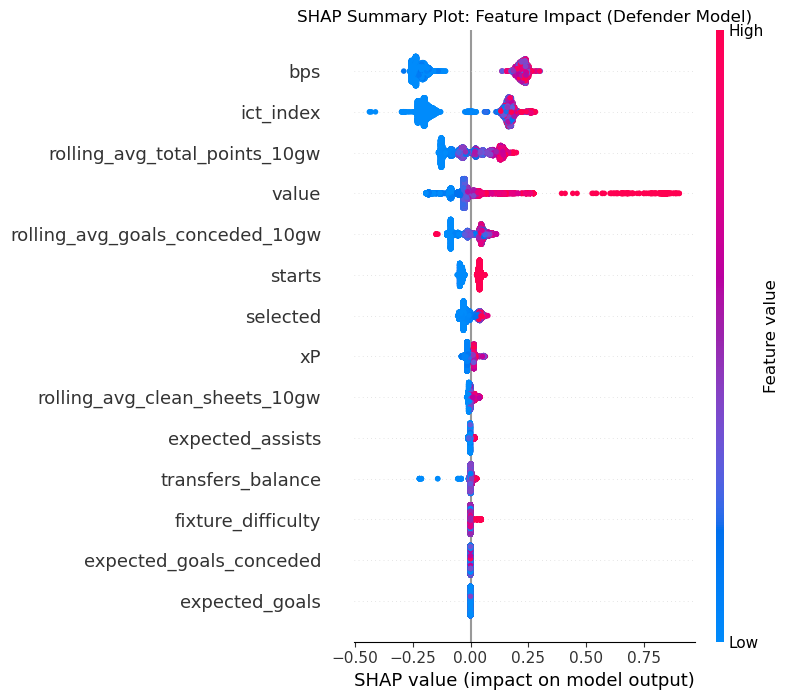

In [57]:
# Generate SHAP dot plot (beeswarm plot)
shap.summary_plot(shap_values, X_train, plot_type="dot", show=False)

# Customize and display the plot
plt.title("SHAP Summary Plot: Feature Impact (Defender Model)")
plt.tight_layout()
plt.show()


Model: XGBoost (Combined)
Training XGBoost (High)...
XGBoost (High) - RMSE: 2.4608193297910432, MAE: 1.702028452745534, R²: 0.07847572403112335

Training XGBoost (Low)...
XGBoost (Low) - RMSE: 2.447286367542869, MAE: 1.6565844790208217, R²: 0.0885834648782563

Training Random Forest...
Random Forest - RMSE: 2.569747752662696, MAE: 1.779000357584032, R²: -0.004912645403358784

Training Gradient Boosting...
Gradient Boosting - RMSE: 2.483716311308575, MAE: 1.6722112479728275, R²: 0.061247081240065615

Training Support Vector Regressor...
Support Vector Regressor - RMSE: 2.5550124953751774, MAE: 1.3298392841188391, R²: 0.006578904233349836

Training K-Nearest Neighbors...
K-Nearest Neighbors - RMSE: 2.710320953747544, MAE: 1.773239711332163, R²: -0.11786347621515736

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1930
[LightGB

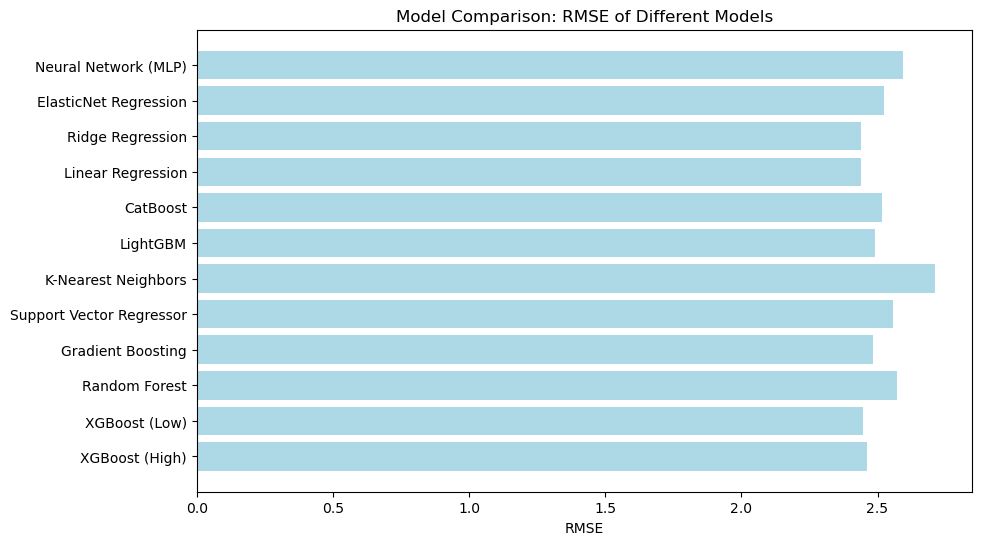

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np

# Combined Model - already calculated in the code you provided
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
mae_combined = np.mean(np.abs(y_pred_combined - y_test_combined))
r2_combined = r2_score(y_test_combined, y_pred_combined)

# Add the combined model results to the comparison list
print(f"Model: XGBoost (Combined)")

# Define a list of models to test, using the best_params_high and best_params_low from the Bayesian optimization
models = {
    "XGBoost (High)": XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42),
    "XGBoost (Low)": XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "Neural Network (MLP)": MLPRegressor(random_state=42, max_iter=1000)
}


# Create a function to train and evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R²": r2, "Predictions": y_pred}

# Iterate through models and store the results
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model_results = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = model_results
    print(f"{model_name} - RMSE: {model_results['RMSE']}, MAE: {model_results['MAE']}, R²: {model_results['R²']}\n")

# Summarize results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  R²: {metrics['R²']}")
    print('-' * 40)

# Optionally: Plot RMSE for all models
import matplotlib.pyplot as plt

model_names = list(results.keys())
rmse_values = [results[model]['RMSE'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='lightblue')
plt.xlabel('RMSE')
plt.title('Model Comparison: RMSE of Different Models')
plt.show()

In [58]:
import joblib

# Save the combined model to a file locally
model_filename = 'best_xgboost_Defmodel.pkl'
joblib.dump(best_xgb, model_filename)

['best_xgboost_Defmodel.pkl']

In [177]:
best_xgb = joblib.load('best_xgboost_DEFmodel.pkl')